In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 178 kB 34.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640245 sha256=c3905baec00a02cb09871e6e126b83a643d47d8dc64100e27ef8f01adf7b434f
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


# Make Sure you Grant the Colab Notebook access to your Drive


In [2]:
# Import all libraries
import pandas as pd #To store and manipulate data
from fbprophet import Prophet
import os #working with files

print("modules done")


modules done


# Merge all csv files into one 

In [ ]:
## Merge 12 months of data into one dfataframe
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales Project/Sales_April_2019.csv')
# df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Get a list of all the file names in the directory using a list ocmprehension
# files = [doc for doc in os.listdir("/content/drive/MyDrive/Colab Notebooks/Sales Project/")]
# files[0]

'Sales_April_2019.csv'

In [ ]:
# Merging 
# all_months_data = pd.DataFrame()
# for doc in files:
  # df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales Project/" + doc)
  # all_months_data = pd.concat([all_months_data, df])

OSError: ignored

In [ ]:
all_months_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Sales Project/year_data" )
all_months_data.head()

NameError: ignored

In [ ]:
all_months_data.shape

(186850, 6)

# Clean Up the Data


In [3]:
sales_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales Project/year_data") #Rename  the dataframe appropriately 

In [4]:
# Drop the NAN values
# Find them first
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.shape

(545, 7)

In [5]:
sales_data = sales_data.dropna(how="all")

**What Month Was The Best For Sales?**

In [6]:
sales_data.shape

(186850, 7)

In [7]:
sales_data.dtypes

Unnamed: 0           int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

All_months_data is a string object, and it is in the MM/DD/YY HH:mm format

In [8]:
#Get the MM from the "Order Date column"

sales_data["Month"] = sales_data["Order Date"].str[0:2]

In [9]:
# How many sales were made each month?


In [10]:
# Use value_counts in the month column to figure it out
sales_data["Month"].value_counts(normalize = True).sort_values(ascending = False)

12    0.134103
10    0.108864
04    0.098113
11    0.094324
05    0.088919
03    0.081334
07    0.076718
06    0.072752
02    0.064276
08    0.064201
09    0.062376
01    0.052113
Or    0.001905
Name: Month, dtype: float64

There's a strange "Or" value. Let's take care of it



In [11]:
# Display all the unique data entries
sales_data["Month"].unique()

array(['07', nan, 'Or', '08', '06', '03', '04', '05', '09', '10', '02',
       '11', '01', '12'], dtype=object)

In [12]:
or_df = sales_data[sales_data["Month"]== "Or"]

In [13]:
or_df.shape

(355, 8)

In [14]:
# Drop the "Or"s
sales_data = sales_data[sales_data['Order Date'].str[0:2]!= "Or"]

In [15]:
sales_data['Month'].unique()

array(['07', nan, '08', '06', '03', '04', '05', '09', '10', '02', '11',
       '01', '12'], dtype=object)

In [16]:
sales_data = sales_data[sales_data['Month'] != "nan"]

In [17]:
sales_data['Month'].unique()

array(['07', nan, '08', '06', '03', '04', '05', '09', '10', '02', '11',
       '01', '12'], dtype=object)

In [18]:
sales_data = sales_data[sales_data["Month"].notna()]

In [19]:
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"] = sales_data["Month"].astype("int32")

# Add a sales Column
To get sales column we will multiply the quantity ordered by the price of each item

In [20]:
sales_data.dtypes

Unnamed: 0           int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [21]:
#Need to make sure sales data is in the proper form before multiplicaion
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype("int32")
sales_data['Price Each'] = sales_data['Price Each'].astype("float")

In [22]:
sales_data.dtypes

Unnamed: 0            int64
Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [23]:
sales_data["Sales"] = sales_data['Price Each']*sales_data['Quantity Ordered']

In [24]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [25]:
# Use a function to get the total sales for every month 
  #Create a copy of the DF
  #find only the values that fit the argument condition and set that as a new df
  #Find the sum of the Sales series in that DF
  #return that value

def get_sales(col_name):
  
  mdf = sales_data[sales_data["Month"]==col_name]
  all_sales = mdf["Month"].sum()

  return all_sales


In [26]:
for value in sales_data["Month"].unique():
  print("The sales volume at "+ str(value) + " is " + str(get_sales(value)))

The sales volume at 7 is 100051
The sales volume at 8 is 95688
The sales volume at 6 is 81324
The sales volume at 3 is 45459
The sales volume at 4 is 73116
The sales volume at 5 is 82830
The sales volume at 9 is 104589
The sales volume at 10 is 202820
The sales volume at 2 is 23950
The sales volume at 11 is 193303
The sales volume at 1 is 9709
The sales volume at 12 is 299808


The Best way to store this is definitely as a dict

In [27]:
volume_sales = {value:get_sales(value) for value in sales_data["Month"].unique() }

In [28]:
# Now let us check the max key
max(volume_sales)

12

In [29]:
sales_data['Product'].unique()

array(['Apple Airpods Headphones', 'Flatscreen TV',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'Google Phone', 'LG Dryer',
       'USB-C Charging Cable', 'Lightning Charging Cable',
       '34in Ultrawide Monitor', 'Wired Headphones', 'Vareebadd Phone',
       '27in FHD Monitor', '20in Monitor', 'ThinkPad Laptop',
       '27in 4K Gaming Monitor', 'Macbook Pro Laptop', 'iPhone',
       'LG Washing Machine'], dtype=object)

In [30]:
results = sales_data.groupby("Month").sum()

Text(0.5, 0, 'Month Number')

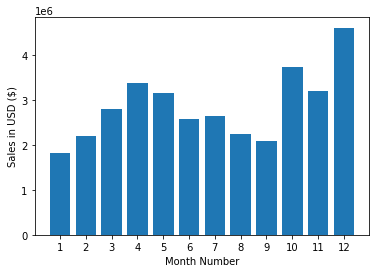

In [31]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")

# What City Had The Best Sales

In [32]:
sales_data.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95
5,5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7,99.99
6,6,222916,Google Phone,1,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7,600.00
7,7,222917,LG Dryer,1,600.00,07/17/19 13:44,"490 Adams St, New York City, NY 10001",7,600.00
8,8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001",7,11.95
9,9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001",7,14.95


the first thing we need to do is to add a city column

In [33]:
# tokenise the purchase address series
# Take the [1] element because in all the addresses, it is always [1] in position
def get_state(address):
  return address.split(",")[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(",")[1] + f" ({get_state(x)})")


In [34]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA)
1,1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA)
2,2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
3,3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA)
4,4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA)


In [35]:
# Let's use groupby to see the city and sales
city_results = sales_data.groupby("City").sum()

In [36]:
city_results.head(11)

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),122928154,16602,2.779908e+06,104794,2.795499e+06
Austin (TX),82709457,11153,1.809874e+06,69829,1.819582e+06
Boston (MA),165758780,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),124308328,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),247743297,33289,5.421435e+06,208325,5.452571e+06
New York City (NY),208439450,27932,4.635371e+06,175741,4.664317e+06
Portland (ME),20641344,2750,4.471893e+05,17144,4.497583e+05
Portland (OR),83402354,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),372569180,50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'Location')

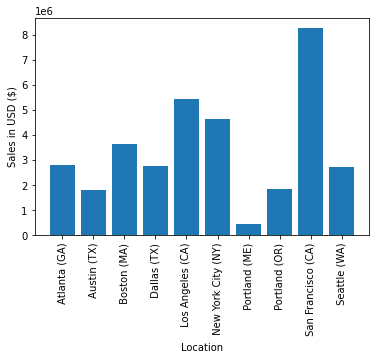

In [37]:
#Fix the inconsistency because the 
#cities = sales_data['City'].unique()
cities = [city for city,df in sales_data.groupby("City")]
plt.bar(cities, city_results["Sales"])
plt.xticks(cities, rotation = "vertical")
plt.ylabel("Sales in USD ($)")
plt.xlabel("Location")


---

---

# What is the best time to show ads to customers to maximise purchases?

this is an interesting problem, we can graph the distribution of sales through time and see what happens


In [38]:
#Turn the "Order Date" Column to a datetime object so that we can easily extract the hoours
sales_data['Order Date']= pd.to_datetime(sales_data['Order Date'])

In [39]:
sales_data.dtypes

Unnamed: 0                   int64
Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [40]:
sales_data["Hour"] = sales_data['Order Date'].dt.hour
sales_data["Minute"]= sales_data['Order Date'].dt.minute
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
1,1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
2,2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
3,3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
4,4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13


In [41]:
sales_data.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
       'Minute'],
      dtype='object')

In [42]:
sales_data.drop(columns= "Unnamed: 0", axis=1, inplace=True)

What's important is not the sum as we have used in questions 1 and 3, but it is the number of occurences at each time

In [43]:
hour_results = sales_data.groupby("Hour").count()
hour_results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


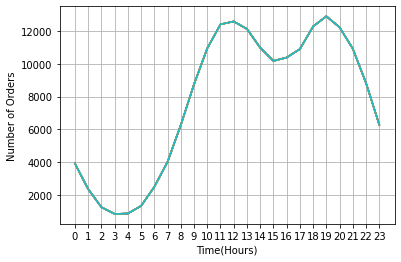

In [44]:
#plot a continous line chart to show the changes
hour_ticks = [hour for hour,df in sales_data.groupby("Hour")]
plt.plot(hour_ticks, sales_data.groupby("Hour").count())
plt.xticks(hour_ticks)
plt.xlabel("Time(Hours)")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# Answer: Judging based on the data that we have, the best time is before 11am and before 7pm as those are the order peaks

---

---

# What Items are Most Frequently Sold Together?
what promo bundles would make sense
We can find duplicate order ID's as a key to find items bought together

In [53]:
work_df = sales_data[sales_data["Order ID"].duplicated(keep= False)]
work_df.head(20)

work_df["Grouped"] = work_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
work_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
118,223028,Vareebadd Phone,1,400.00,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,400.00,San Francisco (CA),10,21,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
119,223028,USB-C Charging Cable,2,11.95,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,23.90,San Francisco (CA),10,21,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
120,223028,Wired Headphones,1,11.99,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,11.99,San Francisco (CA),10,21,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,Vareebadd Phone,1,400.00,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,400.00,Portland (OR),17,19,"Vareebadd Phone,USB-C Charging Cable"
141,223048,USB-C Charging Cable,2,11.95,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,23.90,Portland (OR),17,19,"Vareebadd Phone,USB-C Charging Cable"


In [55]:
#Drop duplicated occurrencs
work_df = work_df[['Order ID', "Grouped"]].drop_duplicates()
work_df.head()

,Order ID,Grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"


In [56]:
from itertools import combinations
from collections import Counter

#first setup a counter
keyz = []
valuez = []
count = Counter()

for row in work_df['Grouped']: 
  row_list = row.split(",")
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  keyz.append(key)
  valuez.append(value)



# Sales Forecasts for San Francisco Chargers

We are using the FB Prophet Library for this. 
There are some things we must take care of first. Here, we can only use a time series on a single product, so we can predict sales for the best selling product in San-Francisco. We will not be using sum, but count

In [65]:
sales_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta (GA),16,51
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle (WA),8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta (GA),12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta (GA),10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle (WA),2,13
5,222915,Bose SoundSport Headphones,1,99.99,2019-07-03 18:30:00,"899 Elm St, San Francisco, CA 94016",7,99.99,San Francisco (CA),18,30
6,222916,Google Phone,1,600.00,2019-07-21 22:39:00,"745 Chestnut St, New York City, NY 10001",7,600.00,New York City (NY),22,39


In [78]:
san_fran = sales_data[sales_data['City'] == " San Francisco (CA)"]

In [77]:
sales_data['City'].unique()

array([' Atlanta (GA)', ' Seattle (WA)', ' San Francisco (CA)',
       ' New York City (NY)', ' Los Angeles (CA)', ' Dallas (TX)',
       ' Boston (MA)', ' Portland (OR)', ' Austin (TX)', ' Portland (ME)'],
      dtype=object)

In [79]:
san_fran.shape

(44732, 11)

In [80]:
product_san_fran = san_fran.groupby("Product").count()

In [85]:
product_san_fran.sort_values(by="City", ascending=False)

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Product,,,,,,,,,,
USB-C Charging Cable,5368,5368,5368,5368,5368,5368,5368,5368,5368,5368
Lightning Charging Cable,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
AAA Batteries (4-pack),4932,4932,4932,4932,4932,4932,4932,4932,4932,4932
AA Batteries (4-pack),4903,4903,4903,4903,4903,4903,4903,4903,4903,4903
Wired Headphones,4592,4592,4592,4592,4592,4592,4592,4592,4592,4592
Apple Airpods Headphones,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705
Bose SoundSport Headphones,3287,3287,3287,3287,3287,3287,3287,3287,3287,3287
27in FHD Monitor,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803
iPhone,1660,1660,1660,1660,1660,1660,1660,1660,1660,1660


The USB-C Charging Cable is the best seller in san_fran
so, let's filter by that 

In [100]:
cable_san_fran = sales_data[sales_data['Product']== "USB-C Charging Cable" ]

So, let's drop the unncessary columns

In [101]:
cable_san_fran.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute'],
      dtype='object')

In [102]:
cable_san_fran = cable_san_fran.drop(['Order ID', 'Product', 'Price Each','Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute'], axis=1)

In [108]:
#reorder the dataframe using required names from Prophet
cable_san_fran["ds"] = cable_san_fran['Order Date']
cable_san_fran["y"] = cable_san_fran['Quantity Ordered']
cable_san_fran.drop(['Quantity Ordered','Order Date'], axis = 1, inplace= True)

In [109]:
cable_san_fran.head()

,ds,y
8,2019-07-14 21:16:00,1
21,2019-07-18 09:21:00,1
38,2019-07-10 08:18:00,1
39,2019-07-28 17:24:00,1
45,2019-07-01 14:27:00,1


In [113]:
#Create the model
m = Prophet()
#Fit the model
training_run = m.fit(cable_san_fran)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [114]:
future = m.make_future_dataframe(periods=365, freq="D")#create 365 predictions on a "D"aily interval

In [118]:
future.tail()

,ds
21594,2020-12-27 04:21:00
21595,2020-12-28 04:21:00
21596,2020-12-29 04:21:00
21597,2020-12-30 04:21:00
21598,2020-12-31 04:21:00


In [119]:
forecast = m.predict(future)

In [122]:
#forecast is our predictions of sales
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 03:40:00,1.091406,0.662041,1.492751,1.091406,1.091406,-0.001092,-0.001092,-0.001092,-0.005891,-0.005891,-0.005891,0.004799,0.004799,0.004799,0.0,0.0,0.0,1.090314
1,2019-01-01 06:03:00,1.091407,0.698206,1.476992,1.091407,1.091407,-0.000322,-0.000322,-0.000322,-0.006648,-0.006648,-0.006648,0.006326,0.006326,0.006326,0.0,0.0,0.0,1.091086
2,2019-01-01 07:47:00,1.091408,0.671375,1.523222,1.091408,1.091408,0.008524,0.008524,0.008524,0.001204,0.001204,0.001204,0.007321,0.007321,0.007321,0.0,0.0,0.0,1.099933
3,2019-01-01 09:36:00,1.091409,0.687288,1.513809,1.091409,1.091409,0.014544,0.014544,0.014544,0.006310,0.006310,0.006310,0.008234,0.008234,0.008234,0.0,0.0,0.0,1.105953
4,2019-01-01 09:48:00,1.091409,0.666406,1.536036,1.091409,1.091409,0.014845,0.014845,0.014845,0.006519,0.006519,0.006519,0.008326,0.008326,0.008326,0.0,0.0,0.0,1.106254


In [123]:
cable_san_fran.head()

,ds,y
8,2019-07-14 21:16:00,1
21,2019-07-18 09:21:00,1
38,2019-07-10 08:18:00,1
39,2019-07-28 17:24:00,1
45,2019-07-01 14:27:00,1


We can see that the yhat values are not terribly accurate, even for the same dates in the forecast and the training data

In [124]:
#Visualising the trends
forecast_useful = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


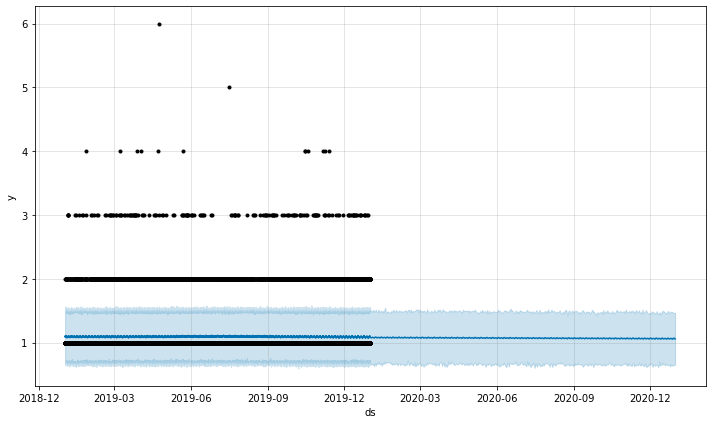

In [127]:
fig1 = m.plot(forecast)

In [128]:
#The blue line represents the forecast. So, we can see that we should not expect to sell more than  a charger a day per order according to Prophet

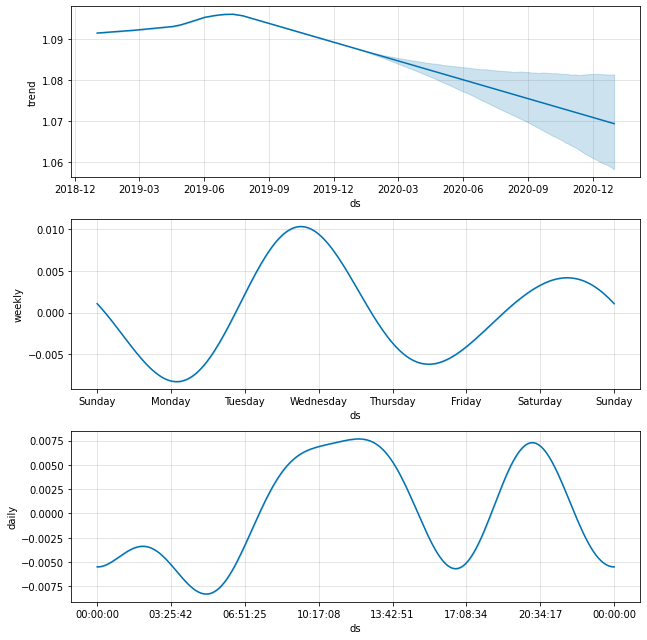

In [129]:
plot2 = m.plot_components(forecast)